In [234]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

/kaggle/input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/airplanes/image_0612.jpg
/kaggle/input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/airplanes/image_0755.jpg
/kaggle/input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/airplanes/image_0178.jpg
/kaggle/input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/airplanes/image_0777.jpg
/kaggle/input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/airplanes/image_0073.jpg
/kaggle/input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/airplanes/image_0123.jpg
/kaggle/input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/airplanes/image_0770.jpg
/kaggle/input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/airplanes/image_0219.jpg
/kaggle/input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/airplanes/image_0270.jpg
/kaggle/input/caltech101-airplanes-mo

In [235]:

import numpy as np
import matplotlib.pyplot as plot
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import *
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import random as rn
import cv2                  
import numpy as np  
from tqdm import tqdm                  
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import time 


In [236]:
#Function for creating the train data for various image class
imagearr=[]
labelarr=[]
sz_image=150
dire="../input/caltech101-airplanes-motorbikes-schooners/caltech101_classification" 
pathMb=os.path.join(dire,'Motorbikes')
pathairP=os.path.join(dire,'airplanes')
pathsch=os.path.join(dire,'schooner')
def lbl_asgn(image,image_type):
    return image_type
def train_create(DIR,image_type):
    for image in tqdm(os.listdir(DIR)):
        lbl=lbl_asgn(image,image_type)            
        path = os.path.join(DIR,image)
        image = cv2.imread(path,cv2.IMREAD_COLOR)
        image = cv2.resize(image, (sz_image,sz_image))     #Resizing images to a common size
        
        imagearr.append(np.array(image))
        labelarr.append(str(lbl))

print("Motorbikes:")
train_create(pathMb,'Motorbikes')
print("Airplanes:")
train_create(pathairP,'airplanes')
print("Schooner:")
train_create(pathsch,'schooner')



Motorbikes:


100%|██████████| 798/798 [00:01<00:00, 651.29it/s]


Airplanes:


100%|██████████| 800/800 [00:01<00:00, 583.04it/s]


Schooner:


100%|██████████| 63/63 [00:00<00:00, 534.58it/s]


In [237]:
le=LabelEncoder()
Y=le.fit_transform(labelarr)
Y=to_categorical(Y,5)
imagearr=np.array(imagearr)
imagearr=imagearr/255

In [238]:
#Splitting into train and test data
x_train,x_test,y_train,y_test=train_test_split(imagearr,Y,test_size=0.25,random_state=42)

In [239]:
np.random.seed(42)
rand.seed(42)
tf.random.set_seed(42)

In [240]:
#Case 1 with 2 layers 
#Building CNN model using 2 convolutional layers, kernel size of (4,4) (2,2) and activation function relu, softmax in dense
# Reference:https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/#pyis-cta-modal
model = tf.keras.Sequential()

#1st layer
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (4,4),strides=(1, 1),
    padding='valid',activation ='relu', input_shape = (150,150,3) ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2) ))

#2nd layer
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (2,2),strides=(1, 1),
    padding='valid',activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [241]:
# Image data generator function 
# Reference: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
batch_size=60
epochs=3
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False, 
        zca_whitening=False,  
        rotation_range=0,  
        zoom_range = 0.0, 
        width_shift_range=0.2,  
        height_shift_range=0.2,  
        horizontal_flip=True, 
        vertical_flip=False,  
        shear_range=0.0,
        channel_shift_range=0.0,
        fill_mode='nearest',
        cval=0.0,
        rescale=None,
        preprocessing_function=None,
        dtype=None)

datagen.fit(x_train)

In [242]:
model.compile(optimizer='sgd',loss='mse',metrics=['accuracy'])


In [243]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 147, 147, 32)      1568      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 72, 72, 64)        8256      
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 71, 71, 64)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 322624)            0         
_________________________________________________________________
dense_38 (Dense)             (None, 512)               165184000 
_________________________________________________________________
activation_19 (Activation)   (None, 512)             

In [244]:
# Model prediction
# Reference:https://pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/
Prediction = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test))

Epoch 1/3
21/21 [==============================] - 27s 1s/step - loss: 0.1099 - accuracy: 0.5044 - val_loss: 0.0919 - val_accuracy: 0.6322
Epoch 2/3
21/21 [==============================] - 27s 1s/step - loss: 0.0958 - accuracy: 0.6297 - val_loss: 0.0817 - val_accuracy: 0.8269
Epoch 3/3
21/21 [==============================] - 26s 1s/step - loss: 0.0839 - accuracy: 0.6996 - val_loss: 0.0865 - val_accuracy: 0.6346


In [245]:

Model_Accuracy1=model.evaluate(x_test, y_test)[1]*100
print("The accuracy of the model for 2 layers: {0:.2f}%".format(Model_Accuracy1))


13/13 [==============================] - 2s 156ms/step - loss: 0.0865 - accuracy: 0.6346
The accuracy of the model for 2 layers: 63.46%


In [246]:
#Case2 with 3 layers
#Building CNN model using 2 convolutional layers, kernel size of (4,4) (2,2) and activation function relu, softmax in dense
# Reference:https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/#pyis-cta-modal

model = tf.keras.Sequential()

#1st layer
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (4,4),strides=(1, 1),
    padding='valid',activation ='relu', input_shape = (150,150,3) ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2) ))

#2nd layer
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (2,2),strides=(1, 1),
    padding='valid',activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)))
 
#3rd layer
model.add(tf.keras.layers.Conv2D(filters =96, kernel_size = (2,2),strides=(1, 1),
    padding='valid',activation ='relu' ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [247]:
# Image data generator function 
# Reference: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
batch_size=60
epochs=5
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False, 
        zca_whitening=False,  
        rotation_range=0,  
        zoom_range = 0.0, 
        width_shift_range=0.2,  
        height_shift_range=0.2,  
        horizontal_flip=True, 
        vertical_flip=False,  
        shear_range=0.0,
        channel_shift_range=0.0,
        fill_mode='nearest',
        cval=0.0,
        rescale=None,
        preprocessing_function=None,
        dtype=None)

datagen.fit(x_train)

In [248]:
model.compile(optimizer='sgd',loss='mse',metrics=['accuracy'])


In [249]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 147, 147, 32)      1568      
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 72, 72, 64)        8256      
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 71, 71, 64)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 70, 70, 96)        24672     
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 69, 69, 96)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 457056)          

In [250]:
# Model prediction
# Reference:https://pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/
Predictions = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test))

Epoch 1/5
21/21 [==============================] - 45s 2s/step - loss: 0.1189 - accuracy: 0.4932 - val_loss: 0.1067 - val_accuracy: 0.5120
Epoch 2/5
21/21 [==============================] - 45s 2s/step - loss: 0.0969 - accuracy: 0.6241 - val_loss: 0.0835 - val_accuracy: 0.8197
Epoch 3/5
21/21 [==============================] - 45s 2s/step - loss: 0.0872 - accuracy: 0.6884 - val_loss: 0.0768 - val_accuracy: 0.8029
Epoch 4/5
21/21 [==============================] - 45s 2s/step - loss: 0.0772 - accuracy: 0.7398 - val_loss: 0.0813 - val_accuracy: 0.7163
Epoch 5/5
21/21 [==============================] - 45s 2s/step - loss: 0.0722 - accuracy: 0.7558 - val_loss: 0.0600 - val_accuracy: 0.8149


In [251]:

Model_Accuracy2=model.evaluate(x_test, y_test)[1]*100
print("The accuracy of the model for 3 layers: {0:.2f}%".format(Model_Accuracy2))


13/13 [==============================] - 3s 257ms/step - loss: 0.0600 - accuracy: 0.8149
The accuracy of the model for 3 layers: 81.49%


In [262]:
#Case3 with 4 layers
#Building CNN model using 2 convolutional layers, kernel size of (4,4) (2,2) and activation function relu, softmax in dense
# Reference:https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/#pyis-cta-modal

model = tf.keras.Sequential()

#1st layer
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (4,4),strides=(1, 1),
    padding='valid',activation ='relu', input_shape = (150,150,3) ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2) ))

#2nd layer
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (2,2),strides=(1, 1),
    padding='valid',activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)))
 
#3rd layer
model.add(tf.keras.layers.Conv2D(filters =96, kernel_size = (2,2),strides=(1, 1),
    padding='valid',activation ='relu' ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)))

#4rd layer
model.add(tf.keras.layers.Conv2D(filters =128, kernel_size = (3,3),strides=(1, 1),
    padding='valid',activation ='relu' ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [263]:
# Image data generator function 
# Reference: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
batch_size=60
epochs=6
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False, 
        zca_whitening=False,  
        rotation_range=0,  
        zoom_range = 0.0, 
        width_shift_range=0.2,  
        height_shift_range=0.2,  
        horizontal_flip=True, 
        vertical_flip=False,  
        shear_range=0.0,
        channel_shift_range=0.0,
        fill_mode='nearest',
        cval=0.0,
        rescale=None,
        preprocessing_function=None,
        dtype=None)

datagen.fit(x_train)

In [264]:
model.compile(optimizer='sgd',loss='mse',metrics=['accuracy'])


In [265]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 147, 147, 32)      1568      
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 72, 72, 64)        8256      
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 71, 71, 64)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 70, 70, 96)        24672     
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 69, 69, 96)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 67, 67, 128)     

In [266]:
# Model prediction
# Reference:https://pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/
Predictions = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test))

Epoch 1/6
21/21 [==============================] - 90s 4s/step - loss: 0.1232 - accuracy: 0.4659 - val_loss: 0.1040 - val_accuracy: 0.5024
Epoch 2/6
21/21 [==============================] - 89s 4s/step - loss: 0.1030 - accuracy: 0.5863 - val_loss: 0.0952 - val_accuracy: 0.5168
Epoch 3/6
21/21 [==============================] - 88s 4s/step - loss: 0.0951 - accuracy: 0.6353 - val_loss: 0.0840 - val_accuracy: 0.8101
Epoch 4/6
21/21 [==============================] - 89s 4s/step - loss: 0.0861 - accuracy: 0.6956 - val_loss: 0.0782 - val_accuracy: 0.8125
Epoch 5/6
21/21 [==============================] - 88s 4s/step - loss: 0.0851 - accuracy: 0.6747 - val_loss: 0.0788 - val_accuracy: 0.7091
Epoch 6/6
21/21 [==============================] - 87s 4s/step - loss: 0.0747 - accuracy: 0.7478 - val_loss: 0.0742 - val_accuracy: 0.7812


In [267]:

Model_Accuracy3=model.evaluate(x_test, y_test)[1]*100
print("The accuracy of the model for 4 layers: {0:.2f}%".format(Model_Accuracy3))


13/13 [==============================] - 7s 522ms/step - loss: 0.0742 - accuracy: 0.7812
The accuracy of the model for 4 layers: 78.12%


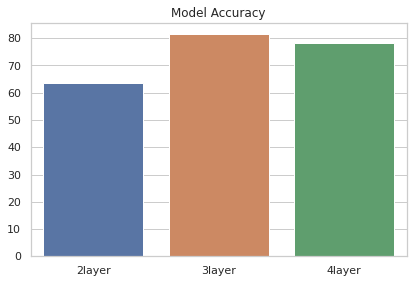

In [269]:
#Making a bar plot of the accuracy across the 3 test cases
plot.title('Model Accuracy')
X_layers=['2layer','3layer','4layer']
Y_Accuracy=[float(format(Model_Accuracy1)),float(format(Model_Accuracy2)),float(format(Model_Accuracy3))]
sns.barplot(X_layers,Y_Accuracy)
plot.show()